## Logistic Regression - Model Evaluation & Diagnostics

In [105]:
library(AER)
library(lmtest) #For Likelihood ratio test
library(car)
library(DescTools) #For PseudoR-Square
library(ResourceSelection) #For Hosler Lemeshow Test
library(survey) #For Wald's Test
library(caret)
library(Deducer)  #for ROC plot
library(ROCR)     #for ROC plot (other way)

In [4]:
data(Affairs, package = "AER")
head(Affairs)
tail(Affairs)
str(Affairs)
summary(Affairs)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
4,0,male,37,10.00,no,3,18,7,4
5,0,female,27,4.00,no,4,14,6,4
11,0,female,32,15.00,yes,1,12,1,4
16,0,male,57,15.00,yes,5,18,6,5
23,0,male,22,0.75,no,2,17,6,3
29,0,female,32,1.50,no,2,17,5,5


,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
1935,7,male,47,15.0,yes,3,16,4,2
1938,1,male,22,1.5,yes,1,12,2,5
1941,7,female,32,10.0,yes,2,18,5,4
1954,2,male,32,10.0,yes,2,17,6,5
1959,2,male,22,7.0,yes,3,18,6,2
9010,1,female,32,15.0,yes,3,14,1,5


'data.frame':	601 obs. of  9 variables:
 $ affairs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ gender       : Factor w/ 2 levels "female","male": 2 1 1 2 2 1 1 2 1 2 ...
 $ age          : num  37 27 32 57 22 32 22 57 32 22 ...
 $ yearsmarried : num  10 4 15 15 0.75 1.5 0.75 15 15 1.5 ...
 $ children     : Factor w/ 2 levels "no","yes": 1 1 2 2 1 1 1 2 2 1 ...
 $ religiousness: int  3 4 1 5 2 2 2 2 4 4 ...
 $ education    : num  18 14 12 18 17 17 12 14 16 14 ...
 $ occupation   : int  7 6 1 6 6 5 1 4 1 4 ...
 $ rating       : int  4 4 4 5 3 5 3 4 2 5 ...


    affairs          gender         age         yearsmarried    children 
 Min.   : 0.000   female:315   Min.   :17.50   Min.   : 0.125   no :171  
 1st Qu.: 0.000   male  :286   1st Qu.:27.00   1st Qu.: 4.000   yes:430  
 Median : 0.000                Median :32.00   Median : 7.000            
 Mean   : 1.456                Mean   :32.49   Mean   : 8.178            
 3rd Qu.: 0.000                3rd Qu.:37.00   3rd Qu.:15.000            
 Max.   :12.000                Max.   :57.00   Max.   :15.000            
 religiousness     education       occupation        rating     
 Min.   :1.000   Min.   : 9.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:14.00   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :16.00   Median :5.000   Median :4.000  
 Mean   :3.116   Mean   :16.17   Mean   :4.195   Mean   :3.932  
 3rd Qu.:4.000   3rd Qu.:18.00   3rd Qu.:6.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :20.00   Max.   :7.000   Max.   :5.000  

In [6]:
#Creating a new binary variable to classify where a person had Affairs or not
Affairs$ynaffair[Affairs$affair == 0 ] <- 0
Affairs$ynaffair[Affairs$affair > 0 ] <- 1

In [7]:
Affairs$ynaffair <- factor(Affairs$ynaffair , level = c(0,1) , labels = c("No","Yes"))
str(Affairs)
table(Affairs$ynaffair)

'data.frame':	601 obs. of  10 variables:
 $ affairs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ gender       : Factor w/ 2 levels "female","male": 2 1 1 2 2 1 1 2 1 2 ...
 $ age          : num  37 27 32 57 22 32 22 57 32 22 ...
 $ yearsmarried : num  10 4 15 15 0.75 1.5 0.75 15 15 1.5 ...
 $ children     : Factor w/ 2 levels "no","yes": 1 1 2 2 1 1 1 2 2 1 ...
 $ religiousness: int  3 4 1 5 2 2 2 2 4 4 ...
 $ education    : num  18 14 12 18 17 17 12 14 16 14 ...
 $ occupation   : int  7 6 1 6 6 5 1 4 1 4 ...
 $ rating       : int  4 4 4 5 3 5 3 4 2 5 ...
 $ ynaffair     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...



 No Yes 
451 150 

In [11]:
#Building Full Logistic Regression Model
fit.full <- glm(ynaffair ~ gender + age + yearsmarried + children + religiousness + education + occupation + rating , 
                data = Affairs , family = binomial() )
summary(fit.full)


Call:
glm(formula = ynaffair ~ gender + age + yearsmarried + children + 
    religiousness + education + occupation + rating, family = binomial(), 
    data = Affairs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5713  -0.7499  -0.5690  -0.2539   2.5191  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.37726    0.88776   1.551 0.120807    
gendermale     0.28029    0.23909   1.172 0.241083    
age           -0.04426    0.01825  -2.425 0.015301 *  
yearsmarried   0.09477    0.03221   2.942 0.003262 ** 
childrenyes    0.39767    0.29151   1.364 0.172508    
religiousness -0.32472    0.08975  -3.618 0.000297 ***
education      0.02105    0.05051   0.417 0.676851    
occupation     0.03092    0.07178   0.431 0.666630    
rating        -0.46845    0.09091  -5.153 2.56e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38 

In [12]:
#Building Reduced Logistic Regression Model with only the significant variables
fit.reduced <- glm(ynaffair ~ age + yearsmarried + religiousness + rating , data = Affairs , family = binomial() )
summary(fit.reduced)


Call:
glm(formula = ynaffair ~ age + yearsmarried + religiousness + 
    rating, family = binomial(), data = Affairs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6278  -0.7550  -0.5701  -0.2624   2.3998  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.93083    0.61032   3.164 0.001558 ** 
age           -0.03527    0.01736  -2.032 0.042127 *  
yearsmarried   0.10062    0.02921   3.445 0.000571 ***
religiousness -0.32902    0.08945  -3.678 0.000235 ***
rating        -0.46136    0.08884  -5.193 2.06e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38  on 600  degrees of freedom
Residual deviance: 615.36  on 596  degrees of freedom
AIC: 625.36

Number of Fisher Scoring iterations: 4


In [16]:
#Comparing the two models:
anova(fit.full , fit.reduced , test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
592,609.5104,NA,NA,NA
596,615.3578,-4,-5.847418,0.2108367


Since the p value is not significant, so there is no difference between the two models, and we go with the model with reduced parameters and lower AIC.

## Logistic Regression Diagnostics
** Model Validity and Goodness of Fit **
    * Likelihood Ratio Test
    * Pseudo R-Square
    * Hosmer Lemeshow Goodness of Fit
** Statistical Test for Individual variable **
    * Wald's Test
** Assesing variable Importance **
    * Look at the abslute value of the t-statistic for each model parameter using the function varImp()
** Model Acceptance **
    * Area under ROC Curve


### Likelihood Ratio Test
Logistic regression is said to provide a better fit to the data if it demonstrates an improvement over a model with fewer predictors. This is performed using the likelihood ratio test, which compares the likelihood of the data under the full model against the likelihood of the data under a model with fewer predictors. 

Removing predictor variables from a model will almost always make the model fit less well (i.e. a model will have a lower log likelihood), but it is necessary to test whether the observed difference in model fit is statistically significant. 

Null Hypothesis holds that the reduced model is true, a p-value for the overall model fit statistic that is less than 0.05 would compel us to reject the null hypothesis. It would provide evidence against the reduced model in favor of the current model. 

The likelihood ratio test can be performed in R using:
    * anova() function in base package with test = "Chisq"
    * lrtest() function from the lmtest package 

In [19]:
# Likelihood Ratio Test
anova(fit.full,fit.reduced,test = "Chisq")
lrtest(fit.full,fit.reduced)

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
592,609.5104,NA,NA,NA
596,615.3578,-4,-5.847418,0.2108367


#Df,LogLik,Df,Chisq,Pr(>Chisq)
9,-304.7552,NA,NA,NA
5,-307.6789,-4,5.847418,0.2108367


### Pseudo R-Square:
Unlike linear regression with ordinary least squares estimation, there is no R2 statistic which explains the proportion of variance in the dependent variable that is explained by the predictors. However, there are a number of pseudo R2 metrics. They indicate the strength of the relationship.

** McFadden’s R2 ** - Defined as 1−[LL(LM)/LL(L0)] where LL(LM) is the log likelihood value for the fitted model and LL(L0) is the log likelihood for the null model with only an intercept as a predictor. The measure ranges from 0 to just under 1, with values closer to zero indicating that the model has no predictive power.

** Cox and Snell R2 ** - Defined as 1−[LL(L0)/LL(LM)]^(2/n) where n is the number of observations. However Cox & Snell R2 cannot reach 1

** Nagerkerke R2 ** - Defined as { 1−[LL(L0)/LL(LM)]^(2/n) / 1 - [LL(L0)]^(2/n)} The range of this model is from 0 to 1

All Pseudo R-Square values are interpreted as reflecting the amount of variation in Y accounted by the Logistic model with 1.0 indicating the perfect model fit.

In [25]:
PseudoR2(fit.full , which = "all")

McFadden     McFaddenAdj        CoxSnell      Nagelkerke   AldrichNelson 
     0.09752564      0.07087385      0.10380294      0.15379507      0.03223890 
VeallZimmermann          Effron McKelveyZavoina            Tjur             AIC 
     0.12662042      0.11614135      0.16746809      0.11361241    627.51041368 
            BIC          logLik         logLik0              G2 
   667.09776809   -304.75520684   -337.68849143     65.86656917

### Hosmer Lemeshow Goodness of Fit Test 
It is computed on data after the observations have been segmented into groups based on having similar predicted probabilities. It examines whether the observed proportions of events are similar to the predicted probabilities of occurence in subgroups of the data set using a pearson chi square test. Small values with large p-values indicate a good fit to the data while large values with p-values below 0.05 indicate a poor fit. The null hypothesis holds that the model fits the data.

For our data, the p-value is large so we accept the Null Hypothesis that the model fits the data.

In [38]:
#Creating a binary variable to do the test, as the Hoslem test cannot be done on factors
#Affairs <- Affairs[,-11]
Affairs$ynaffair_binary[Affairs$affair > 0] = 1
Affairs$ynaffair_binary[Affairs$affair == 0] = 0
hoslem.test(Affairs$ynaffair_binary, fitted(fit.reduced), g=10)


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  Affairs$ynaffair_binary, fitted(fit.reduced)
X-squared = 6.4279, df = 8, p-value = 0.5994


### Wald's Test

A wald test is used to evaluate the statistical significance of each coefficient in the model and is calculated by taking the ratio of the square of the regression coefficient to the square of the standard error of the coefficient.

Null hypothesis: The coefficient of an independent variable in the model is not significantly different from zero. 
If the test failts reject the null hypothesis (i.e. p > 0.05 ), this suggests that removing the variable from the model will not substantially harm the fit of that model.

In [55]:
regTermTest(fit.reduced,"rating")

Wald test for rating
 in glm(formula = ynaffair ~ age + yearsmarried + religiousness + 
    rating, family = binomial(), data = Affairs)
F =  26.97203  on  1  and  596  df: p= 2.8372e-07 

In [54]:
regTermTest(fit.full,"education")

Wald test for education
 in glm(formula = ynaffair ~ gender + age + yearsmarried + children + 
    religiousness + education + occupation + rating, family = binomial(), 
    data = Affairs)
F =  0.1736919  on  1  and  592  df: p= 0.677 

Since the p-value is less than 0.05 we keep the variable. For education, the p-value is greater than 0.05 so we remove the variable from the full model

### Assesing Variable Importance
To assess the relative importance of individual predictors in the model, we can also look at the absolute value of the t-statistic for each model parameter. This can be done by:
    * Observing z-value in the summary of the logistic regression model
    * varImp() in the caret package 

In [60]:
varImp(fit.reduced)

,Overall
age,2.032261
yearsmarried,3.444792
religiousness,3.678276
rating,5.193460


### Area under ROC Curve
ROC Curve plots Sensitivity vs (1-Specificity) i.e. it plots the true positive ratio against the false positive ratio and compares it with random classification. Higher the area under the ROC Curve, better is the prediction ability.
General Rule for Model acceptance is:
* If AUC <= 0.5 , Then No discrimination 
* If 0.7 <= AUC <= 0.8 , Then Acceptable discrimination
* If 0.8 <= AUC <= 0.9 , Then Excellent discrimination
* If AUC > 0.9 , Then Outstanding discrimination

For our model the AUC is 0.7 which is acceptable discrimination.

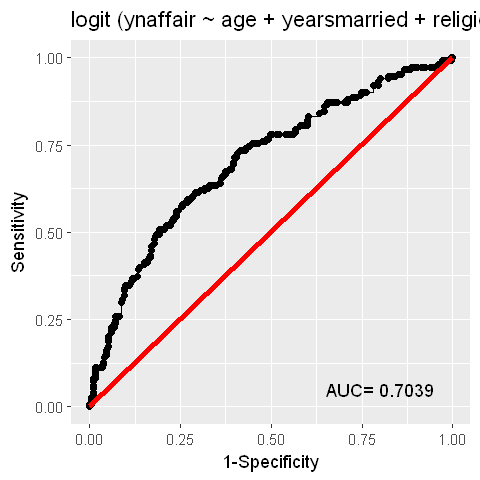

In [87]:
options(repr.plot.width=4, repr.plot.height=4)
rocplot(fit.reduced)

## Computing optimal Cut-off Probability
We compute the Optimal Cut-off based on:
* Youden's Index - Assuming positive and Negative Classifications are equally important
* Cost based Optimal Cut-off - Assuming positive and Negative classifications are not equally important

Note: Accuracy is not used to compute the Optimal Cut-off due to the Accuracy paradox.

### Youden's Index:
It gives the performance of a diagnostic test. Its value ranges from -1 to 1, and has a zero value when a diagnostic test gives the same proportion of positive results for groups with and without the test, i.e the test is useless. A value of 1 indicates that there are no false positives or false negatives, i.e. the test is perfect. The index gives equal weight to false positive and false negative values, so all tests with the same value of the index give the same proportion of total misclassified results.

Youden's Index J(p) = [ Sensitivity(p) + Specificity(p) - 1 ] where p is the cut-off probability

To identify the optimal Cut-off probability, we maximize the Youden's Index

In [104]:
#creating empty vectors to store the results. 
msclaf.cost <- c()
youden.index <- c()
cutoff <- c()
P11 <- c() #correct classification of positive as positive
P00 <- c() #correct classification of negative as negative
P10 <- c() #misclassification of positive class to negative class
P01 <- c() #misclassification of negative class to positive class

n <- length(Affairs$ynaffair)   #Sample Size
pred = predict.glm(fit.reduced, Affairs, type = "response")  #Predicted Probability as per Model

for (i in seq(0.05, 1, .05)) {
  predicted.y = rep("No", n)     #Assigning all predicted value as "No"
  predicted.y[pred > i] = "Yes"  #If predicted value greater than cut-off probability then changing the predicted to "Yes"
  tbl <- table(Affairs$ynaffair, predicted.y) #Creates Classification table based on the Cut-off probability i
  if ( i <= 1) {
    
    P10[20*i] <- tbl[2]/(tbl[2] + tbl[4])    
    P11[20*i] <- tbl[4]/(tbl[2] + tbl[4])   #Sensitivity
    P01[20*i] <- tbl[3]/(tbl[1] + tbl[3])    
    P00[20*i] <- tbl[1]/(tbl[1] + tbl[3])   #Specificity
    
    cutoff[20*i] <- i
    youden.index[20*i] <- P11[20*i] + P00[20*i] - 1
  }
}
youden.table <- cbind(cutoff,P10,P01,P11,P00, youden.index)

#Display the Youden's Index for each cut-off probability:
youden.table

cutoff,P10,P01,P11,P00,youden.index
0.05,0.00000000,0.99556541,1.0000000,0.00443459,0.00443459
0.10,0.02666667,0.90022173,0.9733333,0.09977827,0.07311160
0.15,0.12666667,0.66740576,0.8733333,0.33259424,0.20592757
0.20,0.24000000,0.47450111,0.7600000,0.52549889,0.28549889
0.25,0.36666667,0.33259424,0.6333333,0.66740576,0.30073910
0.30,0.46000000,0.23059867,0.5400000,0.76940133,0.30940133
0.35,0.58666667,0.15742794,0.4133333,0.84257206,0.25590540
0.40,0.70000000,0.08647450,0.3000000,0.91352550,0.21352550
0.45,0.76000000,0.06651885,0.2400000,0.93348115,0.17348115
0.50,0.85333333,0.04212860,0.1466667,0.95787140,0.10453806


### Cost-Base Optimal Cut-off Probability
Youden's index is appropriate only when for a given context both the positive and hegative classifications are equally importnat

If they are not equal then we use a cost based approach. We identify the penalty for mis-classifying a negative as positive and a positive as a negative and build the cost matrix. Then, for each cut-off probability, we try to minimize the cost of penalty. So the cut-off probability which minimizes the cost of penalty is selected as the optimal cut-off.

In [107]:
#creating empty vectors to store the results. 
msclaf.cost <- c()
youden.index <- c()
cutoff <- c()
P11 <- c() #correct classification of positive as positive
P00 <- c() #correct classification of negative as negative
P10 <- c() #misclassification of positive class to negative class
P01 <- c() #misclassification of negative class to positive class

#Building the Cost Matrix:
costs = matrix(c(0,1,1, 0), ncol = 2)   #Defining the cost as: Misclassifying a negative as a positive is twice costly than misclassifying a positive as negative
colnames(costs) = rownames(costs) = c("Yes", "No")
as.table(costs)

n <- length(Affairs$ynaffair)   #Sample Size
pred = predict.glm(fit.reduced, Affairs, type = "response")  #Predicted Probability as per Model

for (i in seq(0.05, 1, .05)) {
  predicted.y = rep("No", n)     #Assigning all predicted value as "No"
  predicted.y[pred > i] = "Yes"  #If predicted value greater than cut-off probability then changing the predicted to "Yes"
  tbl <- table(Affairs$ynaffair, predicted.y) #Creates Classification table based on the Cut-off probability i
  if ( i <= 1) {
    
    P10[20*i] <- tbl[2]/(tbl[2] + tbl[4])    
    P11[20*i] <- tbl[4]/(tbl[2] + tbl[4])   #Sensitivity
    P01[20*i] <- tbl[3]/(tbl[1] + tbl[3])    
    P00[20*i] <- tbl[1]/(tbl[1] + tbl[3])   #Specificity
    
    cutoff[20*i] <- i
    msclaf.cost[20*i] <- P10[20*i]*costs[2] + P01[20*i]*costs[3]
    youden.index[20*i] <- P11[20*i] + P00[20*i] - 1
  }
}
df.cost.table <- cbind(cutoff,P10,P01,P11,P00, youden.index,msclaf.cost)
df.cost.table

    Yes No
Yes   0  1
No    1  0

cutoff,P10,P01,P11,P00,youden.index,msclaf.cost
0.05,0.00000000,0.99556541,1.0000000,0.00443459,0.00443459,0.9955654
0.10,0.02666667,0.90022173,0.9733333,0.09977827,0.07311160,0.9268884
0.15,0.12666667,0.66740576,0.8733333,0.33259424,0.20592757,0.7940724
0.20,0.24000000,0.47450111,0.7600000,0.52549889,0.28549889,0.7145011
0.25,0.36666667,0.33259424,0.6333333,0.66740576,0.30073910,0.6992609
0.30,0.46000000,0.23059867,0.5400000,0.76940133,0.30940133,0.6905987
0.35,0.58666667,0.15742794,0.4133333,0.84257206,0.25590540,0.7440946
0.40,0.70000000,0.08647450,0.3000000,0.91352550,0.21352550,0.7864745
0.45,0.76000000,0.06651885,0.2400000,0.93348115,0.17348115,0.8265188
0.50,0.85333333,0.04212860,0.1466667,0.95787140,0.10453806,0.8954619


### Accuracy of the Model
Note: For Logistic Regression Accuracy is not the characteristic by which we will select the cut-off probability. This is because of the Accuracy Paradox. Nonetheless to compute the accuracy for a particular cut-off the code is as below:

In [123]:
i = 0.3 #Update with the Optimal Cut-off Probability

#Computing the Accuracy Manually:
n <- length(Affairs$ynaffair)   #Sample Size
pred = predict.glm(fit.reduced, Affairs, type = "response")  #Predicted Probability as per Model
predicted.y = rep("No", n)     #Assigning all predicted value as "No"
predicted.y[pred > i] = "Yes"  #If predicted value greater than cut-off probability then changing the predicted to "Yes"
accuracy <- table(Affairs$ynaffair, predicted.y) #Creates Classification table based on the Cut-off probability i
accuracy
sum(diag(accuracy))/sum(accuracy)

#Computing the Accuracy using the Confusion Matrix in Car Package:
confusionMatrix(data=predicted.y, Affairs$ynaffair)

     predicted.y
       No Yes
  No  347 104
  Yes  69  81

[1] 0.7121464

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  347  69
       Yes 104  81
                                          
               Accuracy : 0.7121          
                 95% CI : (0.6741, 0.7481)
    No Information Rate : 0.7504          
    P-Value [Acc > NIR] : 0.985621        
                                          
                  Kappa : 0.2871          
 Mcnemar's Test P-Value : 0.009739        
                                          
            Sensitivity : 0.7694          
            Specificity : 0.5400          
         Pos Pred Value : 0.8341          
         Neg Pred Value : 0.4378          
             Prevalence : 0.7504          
         Detection Rate : 0.5774          
   Detection Prevalence : 0.6922          
      Balanced Accuracy : 0.6547          
                                          
       'Positive' Class : No              
                                          

### Gain Chart for Imbalanced Data

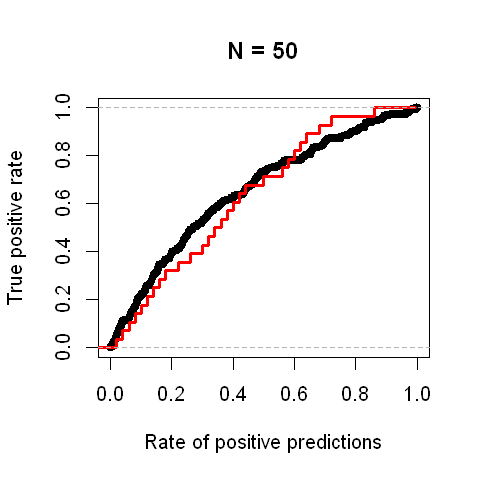

In [155]:
#v <- c(pred = testing_data$predictionsOutput)
#pred_1 <- prediction(fitted(fit.reduced), Affairs$ynaffair)
#gain <- performance(pred_1,"tpr","fpr")
#plot(gain, col="orange", lwd=2)

gain.chart <- function(n) {
    score <- runif(n)
    y <- (runif(n) < score)
    plot(performance(pred_1, "tpr", "rpp"),
         lwd = 7, main = paste("N =", n))
    lines(ecdf((rank(-score)[y == T]) / n),
          verticals = T, do.points = F, col = "red", lwd = 3)
}

set.seed(1)
gain.chart(50)